## Obtaining Infiltration Rate Data

As one of the first stages in a managed aquifer recharge (MAR) project, it is necessary to find a suitable site to develop the structure to recharge the aquifer. In the case of the Namoi watershed, Arshad et al. (2014) have addressed some factors that must be considered in order to assess the feasibility of the projects in economical terms, comparing basin infiltration structures and aquifer storage and recovery facilities. One of the most important factors of MAR project feasibility is the infiltration rate.
Because of the impracticability in economical terms of upscaling from field to watershed sampling, somo properties have usually being calculated from other methods. This is the case of soil hrydological properties, such as infiltration.
It must be considered here that infiltration is a property that varies with time, decreasing up to reach the saturated hydraulic conductivity (Ks). 
In this case, it is expected that the substrate by which the water will recharge groundwater be saturated. Knowing the high variability in Ks from field measurements, it was decided to obtain these values from other methods. 
For this purpose, some well known pedotransfer functions were used (Rise et al., 1995), which depending on the range of clay particles are:

i) For clay contents higher than 40%:

$K_b = 0.0066 exp(\frac{244}{clay})$    

ii) For clay contents lower than 40%:

$K_b = -0.265+0.0086 sand^{1.8}+11.46 CEC^{-0.75}$         

Tha data used was obtained from the *Soil and Landscape Grid of Australia* from the *Terrestrial Ecosystem Reserch Network* with a pixel resolution of 90m x 90m. 

In [1]:
import gdal, osr
import numpy as np
from gdalconst import *
%matplotlib inline
import matplotlib.pyplot as plt


In [3]:
#opening the raster files with Gdal and transforming them to arrays
#in this case, the files correspond to a depth of 0-5 cm
Clay1=gdal.Open(r'C:/Users/ifue3702/Documents/Data Au/NSW/Clay/Clay_0-5_Namoi.tif', GA_ReadOnly)
Clay1_array=Clay1.ReadAsArray()

Sand1=gdal.Open(r'C:/Users/ifue3702/Documents/Data Au/NSW/SAnd/Sand_0-5_Namoi.tif', GA_ReadOnly)
Sand1_array=Sand1.ReadAsArray()

ECE1=gdal.Open(r'C:/Users/ifue3702/Documents/Data Au/NSW/CEC/ECE_0-5_Namoi.tif', GA_ReadOnly)
ECE1_array=ECE1.ReadAsArray()

Ks1_array = np.zeros(shape=(2648,5170))

#same process to other soil depths
#5_15 cm
Clay2=gdal.Open(r'C:/Users/ifue3702/Documents/Data Au/NSW/Clay/Clay_5-15_Namoi.tif', GA_ReadOnly)
Clay2_array=Clay2.ReadAsArray()

Sand2=gdal.Open(r'C:/Users/ifue3702/Documents/Data Au/NSW/SAnd/Sand_5-15_Namoi.tif', GA_ReadOnly)
Sand2_array=Sand2.ReadAsArray()

ECE2=gdal.Open(r'C:/Users/ifue3702/Documents/Data Au/NSW/CEC/ECE_5-15_Namoi.tif', GA_ReadOnly)
ECE2_array=ECE2.ReadAsArray()

Ks2_array = np.zeros(shape=(2648,5170))


#15-30 cm
Clay3=gdal.Open(r'C:/Users/ifue3702/Documents/Data Au/NSW/Clay/Clay_15-30_Namoi.tif', GA_ReadOnly)
Clay3_array=Clay3.ReadAsArray()

Sand3=gdal.Open(r'C:/Users/ifue3702/Documents/Data Au/NSW/SAnd/Sand_15-30_Namoi.tif', GA_ReadOnly)
Sand3_array=Sand3.ReadAsArray()

ECE3=gdal.Open(r'C:/Users/ifue3702/Documents/Data Au/NSW/CEC/ECE_15-30_Namoi.tif', GA_ReadOnly)
ECE3_array=ECE3.ReadAsArray()

Ks3_array = np.zeros(shape=(2648,5170))


#30-60 cm
Clay4=gdal.Open(r'C:/Users/ifue3702/Documents/Data Au/NSW/Clay/Clay_30-60_Namoi.tif', GA_ReadOnly)
Clay4_array=Clay4.ReadAsArray()

Sand4=gdal.Open(r'C:/Users/ifue3702/Documents/Data Au/NSW/SAnd/Sand_30-60_Namoi.tif', GA_ReadOnly)
Sand4_array=Sand4.ReadAsArray()

ECE4=gdal.Open(r'C:/Users/ifue3702/Documents/Data Au/NSW/CEC/ECE_30-60_Namoi.tif', GA_ReadOnly)
ECE4_array=ECE4.ReadAsArray()

Ks4_array = np.zeros(shape=(2648,5170))


#60-100 cm
Clay5=gdal.Open(r'C:/Users/ifue3702/Documents/Data Au/NSW/Clay/Clay_60-199_Namoi.tif', GA_ReadOnly)
Clay5_array=Clay5.ReadAsArray()

Sand5=gdal.Open(r'C:/Users/ifue3702/Documents/Data Au/NSW/SAnd/Sand_60-100_Namoi.tif', GA_ReadOnly)
Sand5_array=Sand5.ReadAsArray()

ECE5=gdal.Open(r'C:/Users/ifue3702/Documents/Data Au/NSW/CEC/ECE_60-100_Namoi.tif', GA_ReadOnly)
ECE5_array=ECE5.ReadAsArray()

Ks5_array = np.zeros(shape=(2648,5170))


#100-200 cm
Clay6=gdal.Open(r'C:/Users/ifue3702/Documents/Data Au/NSW/Clay/Clay_100-200_Namoi.tif', GA_ReadOnly)
Clay6_array=Clay6.ReadAsArray()

Sand6=gdal.Open(r'C:/Users/ifue3702/Documents/Data Au/NSW/SAnd/Sand_100-200_Namoi.tif', GA_ReadOnly)
Sand6_array=Sand6.ReadAsArray()

ECE6=gdal.Open(r'C:/Users/ifue3702/Documents/Data Au/NSW/CEC/ECE_100-200_Namoi.tif', GA_ReadOnly)
ECE6_array=ECE6.ReadAsArray()

Ks6_array = np.zeros(shape=(2648,5170))

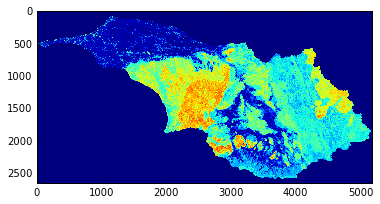

In [26]:
#define a function to create a new array with inputs of previous arrays 
def ks(Clay, Sand, ECE, Ks):
    for [i,j], value in np.ndenumerate(Clay):
        #the function go throught all the values in the array (all the pixels of the image). It checks the conditions, and assign a value to the pixel depending on the condition.
        if Clay[i,j] > 40.0:
            Ks[i,j]=(0.0066*np.exp(244.0/Clay[i,j]))
        elif 0<Clay[i,j]<=40:
            Ks[i,j]=(-0.265+0.0086*(Sand[i,j])**1.8+11.46*(ECE[i,j])**(-0.75))
        else:
            Ks[i,j]=0
ks(Clay1_array, Sand1_array, ECE1_array, Ks1_array)#run the function
plt.imshow(Ks1_array)#plot the array

In [27]:
'''This script transform the array to a raster image and georreferences it =)'''
#function to export array to tif
def array_to_raster(array, dst_filename):
    """Array > Raster
    Save a raster from a C order array.

    :param array: ndarray
    """
    dst_filename = 'C:/Users/ifue3702/Documents/Data Au/NSW/Ks_PTF/Ks2.tif'
#file to create

    # You need to get those values like you did.
    x_pixels = 5170  # number of pixels in x
    y_pixels = 2648  # number of pixels in y
    PIXEL_SIZE = 0.000833333  # size of the pixel...        
    x_min = 147.39291452904  
    y_max = -29.7000920265888  # x_min & y_max are like the "top left" corner.

    driver = gdal.GetDriverByName('GTiff')

    dataset = driver.Create(
        dst_filename,
        x_pixels,
        y_pixels,
        1,
        gdal.GDT_Float32, )

    dataset.SetGeoTransform((
        x_min,    # 0
        PIXEL_SIZE,  # 1
        0,                      # 2
        y_max,    # 3
        0,                      # 4
        -PIXEL_SIZE))  

    outRasterSRS=osr.SpatialReference()
    outRasterSRS.ImportFromEPSG(4326)
    dataset.SetProjection(outRasterSRS.ExportToWkt())
    dataset.GetRasterBand(1).WriteArray(array)
    dataset.FlushCache()  # Write to disk.
    return dataset, dataset.GetRasterBand(1)  #If you need to return, remenber to return  also the dataset because the band don`t live without dataset.

array_to_raster(Ks1_array)#runs the function 

(<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x0000000019B1A2A0> >,
 <osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x0000000019B1AB40> >)

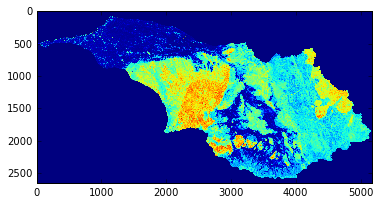

In [28]:
#same process to other soil depths
#5_15 cm

ks(Clay2_array, Sand2_array, ECE2_array, Ks2_array)#run the function
plt.imshow(Ks2_array)#plot the array

In [8]:
'''This script transform the array to a raster image and georreferences it =)'''
#function to export array to tif
def new_array_to_raster(array, dst_filename):
    """Array > Raster
    Save a raster from a C order array.

    :param array: ndarray
    """
#file to create

    # You need to get those values like you did.
    x_pixels = 5170  # number of pixels in x
    y_pixels = 2648  # number of pixels in y
    PIXEL_SIZE = 0.000833333  # size of the pixel...        
    x_min = 147.39291452904  
    y_max = -29.7000920265888  # x_min & y_max are like the "top left" corner.

    driver = gdal.GetDriverByName('GTiff')

    dataset = driver.Create(
        dst_filename,
        x_pixels,
        y_pixels,
        1,
        gdal.GDT_Float32, )

    dataset.SetGeoTransform((
        x_min,    # 0
        PIXEL_SIZE,  # 1
        0,                      # 2
        y_max,    # 3
        0,                      # 4
        -PIXEL_SIZE))  

    outRasterSRS=osr.SpatialReference()
    outRasterSRS.ImportFromEPSG(4326)
    dataset.SetProjection(outRasterSRS.ExportToWkt())
    dataset.GetRasterBand(1).WriteArray(array)
    dataset.FlushCache()  # Write to disk.
    return dataset, dataset.GetRasterBand(1)  #If you need to return, remenber to return  also the dataset because the band don`t live without dataset.

new_array_to_raster(Ks2_array, 'C:/Users/ifue3702/Documents/Data Au/NSW/Ks_PTF/Ks_5-10.tif')#runs the function 
                

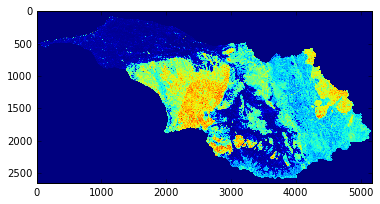

In [31]:
#15-30 cm

ks(Clay3_array, Sand3_array, ECE3_array, Ks3_array)#run the function
new_array_to_raster(Ks3_array, 'C:/Users/ifue3702/Documents/Data Au/NSW/Ks_PTF/Ks_15-30.tif')
plt.imshow(Ks3_array)#plot the array

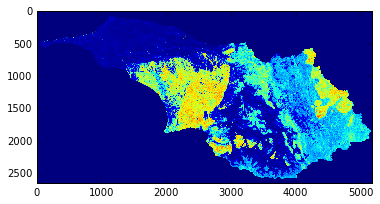

In [32]:
#30-60 cm

ks(Clay4_array, Sand4_array, ECE4_array, Ks4_array)#run the function
new_array_to_raster(Ks4_array, 'C:/Users/ifue3702/Documents/Data Au/NSW/Ks_PTF/Ks_30-60.tif')
plt.imshow(Ks4_array)#plot the array

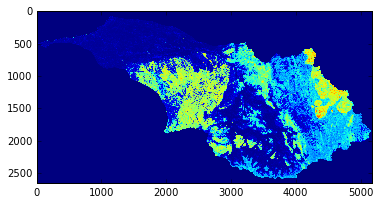

In [34]:
#60-100 cm

ks(Clay5_array, Sand5_array, ECE5_array, Ks5_array)#run the function
new_array_to_raster(Ks5_array, 'C:/Users/ifue3702/Documents/Data Au/NSW/Ks_PTF/Ks_60-100.tif')
plt.imshow(Ks5_array)#plot the array

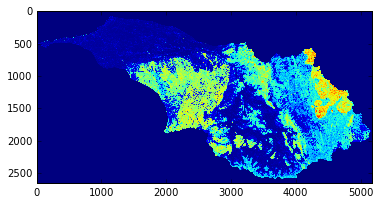

In [35]:
#100-200 cm

ks(Clay6_array, Sand6_array, ECE6_array, Ks6_array)#run the function
new_array_to_raster(Ks6_array, 'C:/Users/ifue3702/Documents/Data Au/NSW/Ks_PTF/Ks_100-200.tif')
plt.imshow(Ks6_array)#plot the array

As we have different soil hydraulic conductivities depending on the soil depth, and assuming that the vertical anisotropy (caused by pedological discontinuities) isn't enougth to impede the vertical water movement, one approach that can be used to infer the total Ks of the soil profile is to calculate the weighted average considering the thickness of the vertical soil measuremets. 
        

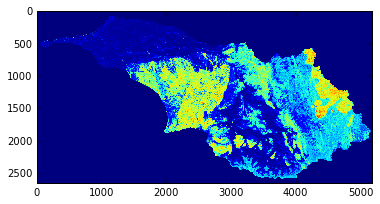

In [37]:
Ks1_new = gdal.Open(r'C:/Users/ifue3702/Documents/Data Au/NSW/Ks_PTF/Ks2.tif', GA_ReadOnly)
Ks1_new_array = Ks1_new.ReadAsArray()

Ks2_new = gdal.Open(r'C:/Users/ifue3702/Documents/Data Au/NSW/Ks_PTF/Ks_5-10.tif', GA_ReadOnly)
Ks2_new_array = Ks2_new.ReadAsArray()

Ks3_new = gdal.Open(r'C:/Users/ifue3702/Documents/Data Au/NSW/Ks_PTF/Ks_15-30.tif', GA_ReadOnly)
Ks3_new_array = Ks3_new.ReadAsArray()

Ks4_new = gdal.Open(r'C:/Users/ifue3702/Documents/Data Au/NSW/Ks_PTF/Ks_30-60.tif', GA_ReadOnly)
Ks4_new_array = Ks4_new.ReadAsArray()

Ks5_new = gdal.Open(r'C:/Users/ifue3702/Documents/Data Au/NSW/Ks_PTF/Ks_60-100.tif', GA_ReadOnly)
Ks5_new_array = Ks5_new.ReadAsArray()

Ks6_new = gdal.Open(r'C:/Users/ifue3702/Documents/Data Au/NSW/Ks_PTF/Ks_100-200.tif', GA_ReadOnly)
Ks6_new_array = Ks6_new.ReadAsArray()

Ks1_thick= 5/200
Ks2_thick= 10/200
Ks3_thick= 15/200
Ks4_thick= 30/200
Ks5_thick= 40/200
Ks6_thick= 100/200

Ks_total = np.zeros(shape=(2648,5170))

def weighted_average (x1,x1thick,x2,x2thick,x3,x3thick,x4,x4thick,x5,x5thick,x6,x6thick,xz):
    for [i,j], value in np.ndenumerate(Ks_total):
        xz[i,j] = x1[i,j]*x1thick + x2[i,j]*x2thick + x3[i,j]*x3thick + x4[i,j]*x4thick + x5[i,j]*x5thick + x6[i,j]*x6thick

weighted_average(Ks1_new_array,Ks1_thick,Ks2_new_array,Ks2_thick,Ks3_new_array,Ks3_thick,Ks4_new_array,Ks4_thick,Ks5_new_array,Ks5_thick,Ks6_new_array,Ks6_thick,Ks_total)
new_array_to_raster(Ks_total, 'C:/Users/ifue3702/Documents/Data Au/NSW/Ks_PTF/Ks_total.tif')
plt.imshow(Ks_total)#plot the array    

## Ks from Rawls et al. (1983)

Besides, some parameters of the Green-Ampt equation were calculated (Brutsaert, 1967):

$\theta_e=\phi_{total}-\theta_r$

$K_s=233280\frac{(\theta_e/\Psi_b)^2\lambda^2}{(\lambda+1)(\lambda +2)}$

where $\phi_{total}$ corresponds to total porosity or $1-Bulk density/2.65$, $\theta_r$ to residual soil moisture content (cm<sup>3</sup> cm<sup>-3</sup>), $\theta_e$ is considered as effective porosity, $K_s$ is the saturated hydraulic conductivity in m d<sup>-1</sup>, $\Psi_b$ is bubbling pressure (cm), and $\lambda$ is the pore size distribution index(Suleiman and Ritchie, 2001).

From Rawls et al. (1983) some regressions were used to calculate this parameters.

Tha data used was obtained from the *Soil and Landscape Grid of Australia* from the *Terrestrial Ecosystem Reserch Network* with a pixel resolution of 90m x 90m. 

In [4]:
Bd1=gdal.Open(r'C:/Users/ifue3702/Documents/Data Au/NSW/Bd/BD_0-5_Namoi.tif', GA_ReadOnly)
Bd1_array=Bd1.ReadAsArray()
Bd2=gdal.Open(r'C:/Users/ifue3702/Documents/Data Au/NSW/Bd/Bd_5-15_Namoi.tif', GA_ReadOnly)
Bd2_array=Bd2.ReadAsArray()
Bd3=gdal.Open(r'C:/Users/ifue3702/Documents/Data Au/NSW/Bd/Bd_15-30_Namoi.tif', GA_ReadOnly)
Bd3_array=Bd3.ReadAsArray()
Bd4=gdal.Open(r'C:/Users/ifue3702/Documents/Data Au/NSW/Bd/Bd_30-60_Namoi.tif', GA_ReadOnly)
Bd4_array=Bd4.ReadAsArray()
Bd5=gdal.Open(r'C:/Users/ifue3702/Documents/Data Au/NSW/Bd/Bd_60-100_Namoi.tif', GA_ReadOnly)
Bd5_array=Bd5.ReadAsArray()
Bd6=gdal.Open(r'C:/Users/ifue3702/Documents/Data Au/NSW/Bd/Bd_100-200_Namoi.tif', GA_ReadOnly)
Bd6_array=Bd6.ReadAsArray()



In [5]:
total_por1 = np.zeros(shape=(2648,5170))
total_por2 = np.zeros(shape=(2648,5170))
total_por3 = np.zeros(shape=(2648,5170))
total_por4 = np.zeros(shape=(2648,5170))
total_por5 = np.zeros(shape=(2648,5170))
total_por6 = np.zeros(shape=(2648,5170))

res_por1 = np.zeros(shape=(2648,5170))
res_por2 = np.zeros(shape=(2648,5170))
res_por3 = np.zeros(shape=(2648,5170))
res_por4 = np.zeros(shape=(2648,5170))
res_por5 = np.zeros(shape=(2648,5170))
res_por6 = np.zeros(shape=(2648,5170))

ef_porosity1 = np.zeros(shape=(2648,5170))
ef_porosity2 = np.zeros(shape=(2648,5170))
ef_porosity3 = np.zeros(shape=(2648,5170))
ef_porosity4 = np.zeros(shape=(2648,5170))
ef_porosity5 = np.zeros(shape=(2648,5170))
ef_porosity6 = np.zeros(shape=(2648,5170))

Bub_press1 = np.zeros(shape=(2648,5170))
Bub_press2 = np.zeros(shape=(2648,5170))
Bub_press3 = np.zeros(shape=(2648,5170))
Bub_press4 = np.zeros(shape=(2648,5170))
Bub_press5 = np.zeros(shape=(2648,5170))
Bub_press6 = np.zeros(shape=(2648,5170))

lamb1 = np.zeros(shape=(2648,5170))
lamb2 = np.zeros(shape=(2648,5170))
lamb3 = np.zeros(shape=(2648,5170))
lamb4 = np.zeros(shape=(2648,5170))
lamb5 = np.zeros(shape=(2648,5170))
lamb6 = np.zeros(shape=(2648,5170))

Ks1_Rawl = np.zeros(shape=(2648,5170))
Ks2_Rawl = np.zeros(shape=(2648,5170))
Ks3_Rawl = np.zeros(shape=(2648,5170))
Ks4_Rawl = np.zeros(shape=(2648,5170))
Ks5_Rawl = np.zeros(shape=(2648,5170))
Ks6_Rawl = np.zeros(shape=(2648,5170))
Kstotal_Rawl = np.zeros(shape=(2648,5170))

#function to obtain porosity
def porosity(Bulk_density, total_porosity):
    for [i,j], value in np.ndenumerate(Bulk_density):
        if Bulk_density[i,j] <= 0:
            total_porosity[i,j] = 0
        else:
            total_porosity[i,j]=1-(Bulk_density[i,j]/2.65)
            
porosity(Bd1_array, total_por1)
porosity(Bd2_array, total_por2)
porosity(Bd3_array, total_por3)
porosity(Bd4_array, total_por4)
porosity(Bd5_array, total_por5)
porosity(Bd6_array, total_por6)

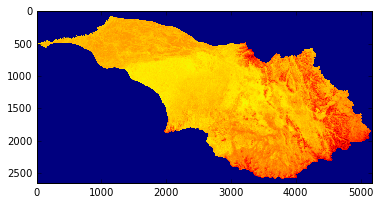

In [79]:
new_array_to_raster(total_por1, 'C:/Users/ifue3702/Documents/Data Au/NSW/Ks_PTF/total_poro2.tif')
plt.imshow(total_por1)

In [10]:
#function to obtain residual porosity arrays
def residual (total_por, res_por, Sand, Clay):
    for [i,j], value in np.ndenumerate(total_por):
        if total_por[i,j]<=0:
            res_por[i,j]=0
        else:
            res_por[i,j]=(-0.0182482+0.00087269*Sand[i,j]+0.00513488*Clay[i,j]+
                         0.02939286*total_por[i,j]-0.00015395*Clay[i,j]**2-0.0010827*Sand[i,j]*total_por[i,j]-
                         0.00018233*Clay[i,j]**2*(total_por[i,j])**2+0.00030703*Clay[i,j]**2*total_por[i,j]-
                         0.0023584*(total_por[i,j])**2*Clay[i,j])

residual(total_por1, res_por1, Sand1_array, Clay1_array)
residual(total_por2, res_por2, Sand2_array, Clay2_array)
residual(total_por3, res_por3, Sand3_array, Clay3_array)
residual(total_por4, res_por4, Sand4_array, Clay4_array)
residual(total_por5, res_por5, Sand5_array, Clay5_array)
residual(total_por6, res_por6, Sand6_array, Clay6_array)



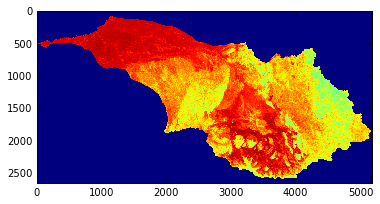

In [11]:
new_array_to_raster(res_por1, 'C:/Users/ifue3702/Documents/Data Au/NSW/Ks_PTF/residual.tif')
plt.imshow(res_por1)

In [12]:
#function to obtain efective porosities arrays

def efective (total_por, res_por, ef_porosity):
    
    for [i,j], value in np.ndenumerate(total_por):
        if total_por[i,j]<=0:
            ef_porosity[i,j]=0
        else:          
            ef_porosity[i,j]=total_por[i,j]-res_por[i,j]

efective(total_por1, res_por1, ef_porosity1)
efective(total_por2, res_por2, ef_porosity2)
efective(total_por3, res_por3, ef_porosity3)
efective(total_por4, res_por4, ef_porosity4)
efective(total_por5, res_por5, ef_porosity5)
efective(total_por6, res_por6, ef_porosity6)


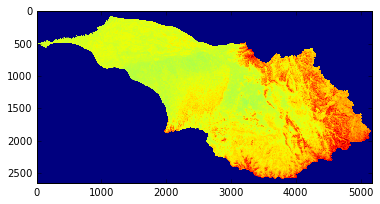

In [13]:
new_array_to_raster(ef_porosity1, 'C:/Users/ifue3702/Documents/Data Au/NSW/Ks_PTF/efective.tif')
plt.imshow(ef_porosity1)

In [19]:
#function to obtain Bubble pressure
def Bubble (total_por, Sand, Clay, Bub_press):
    
    for [i,j], value in np.ndenumerate(Bub_press):
        if total_por[i,j]<=0:
            Bub_press[i,j]=0
        else:
            Bub_press[i,j]=np.exp(5.3396738+0.1845038*Clay[i,j]-2.48394546*total_por[i,j]-
                                 0.00213853*Clay[i,j]**2-0.04356349*Sand[i,j]*total_por[i,j]-
                                 0.61745089*Clay[i,j]*total_por[i,j]+0.00143598*Sand[i,j]**2*total_por[i,j]**2-
                                 0.00855375*Clay[i,j]**2*total_por[i,j]**2-0.00001282*Sand[i,j]**2*Clay[i,j]+
                                 0.00895359*Clay[i,j]**2*total_por[i,j]-0.00072472*Sand[i,j]**2*total_por[i,j]+
                                 0.0000054*Clay[i,j]**2*Sand[i,j]+0.50028060*total_por[i,j]**2*Clay[i,j])
          
Bubble(total_por1, Sand1_array, Clay1_array, Bub_press1)
Bubble(total_por2, Sand2_array, Clay2_array, Bub_press2)
Bubble(total_por3, Sand3_array, Clay3_array, Bub_press3)
Bubble(total_por4, Sand4_array, Clay4_array, Bub_press4)
Bubble(total_por5, Sand5_array, Clay5_array, Bub_press5)
Bubble(total_por6, Sand6_array, Clay6_array, Bub_press6)



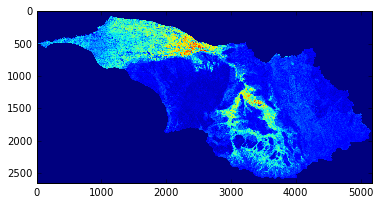

In [20]:
new_array_to_raster(Bub_press1, 'C:/Users/ifue3702/Documents/Data Au/NSW/Ks_PTF/bub.tif')
plt.imshow(Bub_press1)#plot the array

In [26]:
#function to obtain lambda arrays
def lamda (total_por, Sand, Clay, lamb):
    for [i,j], value in np.ndenumerate(total_por):
        if total_por[i,j]<=0:
            lamb[i,j]=0
        else: 
            lamb[i,j]=np.exp(-0.7842831+0.0177544*Sand[i,j]-1.062498*total_por[i,j]-
                            0.00005304*Sand[i,j]**2-0.00273493*Clay[i,j]**2+1.11134946*total_por[i,j]**2-
                            0.03088295*Sand[i,j]*total_por[i,j]+0.00026587*Sand[i,j]**2*total_por[i,j]**2-
                            0.00610522*Clay[i,j]**2*total_por[i,j]**2-0.00000235*Sand[i,j]**2*Clay[i,j]+
                            0.00798746*Clay[i,j]**2*total_por[i,j]-0.00674491*total_por[i,j]**2*Clay[i,j])
          
        
lamda(total_por1, Sand1_array, Clay1_array, lamb1)
lamda(total_por2, Sand2_array, Clay2_array, lamb2)
lamda(total_por3, Sand3_array, Clay3_array, lamb3)
lamda(total_por4, Sand4_array, Clay4_array, lamb4)
lamda(total_por5, Sand5_array, Clay5_array, lamb5)
lamda(total_por6, Sand6_array, Clay6_array, lamb6)



In [27]:
#function to obtain Ks values
def Ks_rawl (ef, bub, lam, ks):
    for [i,j], value in np.ndenumerate(ef):
        if ef[i,j]<=0:
            ks[i,j]=0
        else: 
            ks[i,j]=233280*((ef[i,j]/bub[i,j])**2*lam[i,j]**2)/((lam[i,j]+1)*(lam[i,j]+2))

       
Ks_rawl(ef_porosity1, Bub_press1, lamb1, Ks1_Rawl)
Ks_rawl(ef_porosity2, Bub_press2, lamb2, Ks2_Rawl)
Ks_rawl(ef_porosity3, Bub_press3, lamb3, Ks3_Rawl)
Ks_rawl(ef_porosity4, Bub_press4, lamb4, Ks4_Rawl)
Ks_rawl(ef_porosity5, Bub_press5, lamb5, Ks5_Rawl)
Ks_rawl(ef_porosity6, Bub_press6, lamb6, Ks6_Rawl)


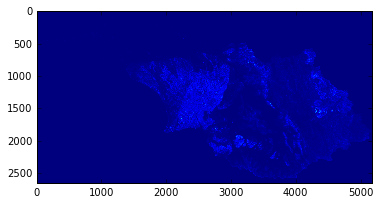

In [28]:
#function to obtain a Ks weighted average 
def Total (x1,x1thick,x2,x2thick,x3,x3thick,x4,x4thick,x5,x5thick,x6,x6thick,xz):
    for [i,j], value in np.ndenumerate(xz):
        xz[i,j] = x1[i,j]*x1thick + x2[i,j]*x2thick + x3[i,j]*x3thick + x4[i,j]*x4thick + x5[i,j]*x5thick + x6[i,j]*x6thick

Total(Ks1_Rawl, Ks1_thick, Ks2_Rawl, Ks2_thick, Ks3_Rawl, Ks3_thick,
      Ks4_Rawl, Ks4_thick, Ks5_Rawl, Ks5_thick, Ks6_Rawl, Ks6_thick,
      Kstotal_Rawl)

#transform final Ks array to raster georreferenced 
new_array_to_raster(Kstotal_Rawl, 'C:/Users/ifue3702/Documents/Data Au/NSW/Ks_PTF/Kstotal_Rawl.tif')
plt.imshow(Kstotal_Rawl)#plot the array

## Ks Rawls and Brakensiek, 1989

Cronican and Gribb (2004) mention this paper with a new PDF to calculate Ks, obtained from a dataset of 1323 soils in USA

In [30]:
Ks1_Rawl_two = np.zeros(shape=(2648,5170))
Ks2_Rawl_two = np.zeros(shape=(2648,5170))
Ks3_Rawl_two = np.zeros(shape=(2648,5170))
Ks4_Rawl_two = np.zeros(shape=(2648,5170))
Ks5_Rawl_two = np.zeros(shape=(2648,5170))
Ks6_Rawl_two = np.zeros(shape=(2648,5170))
Kstotal_Rawl_two = np.zeros(shape=(2648,5170))

#function to obtain Ks values
def Ks_rawl_two (total_por, Sand, Clay, ks):
    for [i,j], value in np.ndenumerate(total_por):
        if total_por[i,j]<=0:
            ks[i,j]=0
        else: 
            ks[i,j]=(np.exp(19.52348*total_por[i,j]-8.96847-0.028212*Clay[i,j]+0.00018107*Sand[i,j]**2-
                           0.0094125*Clay[i,j]**2-8.395215*total_por[i,j]**2+0.077718*Sand[i,j]*total_por[i,j]-
                           0.00298*Sand[i,j]**2*total_por[i,j]**2-0.019492*Clay[i,j]**2*total_por[i,j]**2+
                           0.0000173*Sand[i,j]**2*Clay[i,j]+0.02733*Clay[i,j]**2*total_por[i,j]+
                           0.001434*Sand[i,j]**2*total_por[i,j]-0.0000035*Clay[i,j]**2*Sand[i,j]))*24/100
       
    
Ks_rawl_two(total_por1, Sand1_array, Clay1_array, Ks1_Rawl_two)
Ks_rawl_two(total_por2, Sand2_array, Clay2_array, Ks2_Rawl_two)
Ks_rawl_two(total_por3, Sand3_array, Clay3_array, Ks3_Rawl_two)
Ks_rawl_two(total_por4, Sand4_array, Clay4_array, Ks4_Rawl_two)
Ks_rawl_two(total_por5, Sand5_array, Clay5_array, Ks5_Rawl_two)
Ks_rawl_two(total_por6, Sand6_array, Clay6_array, Ks6_Rawl_two)

Total(Ks1_Rawl_two, Ks1_thick, Ks2_Rawl_two, Ks2_thick, Ks3_Rawl_two, Ks3_thick,
      Ks4_Rawl_two, Ks4_thick, Ks5_Rawl_two, Ks5_thick, Ks6_Rawl_two, Ks6_thick,
      Kstotal_Rawl_two)

#transform final Ks array to raster georreferenced 
new_array_to_raster(Kstotal_Rawl_two, 'C:/Users/ifue3702/Documents/Data Au/NSW/Ks_PTF/Kstotal_Rawl_two.tif')
plt.imshow(Ks1_Rawl_two)#plot the array

KeyboardInterrupt: 

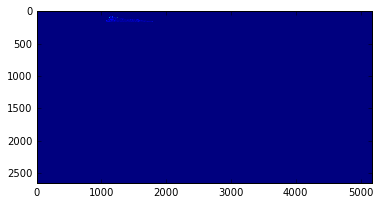

In [31]:
plt.imshow(Ks1_Rawl_two)

Another method could be the use of Rosseta model, which makes use of other PTF.

There is a paper of Paydar and Ringrose-Voase (2003), in which the authors analize the poor results of applying PTF to some soil datasets in Australia, critizysing the lack of soil hydrological measurements. 

The is also another article of Minasny and McBratney (2000), where they assessed pedotransfer functions 

## Ks obtained from Forrest et al., (1985).

In another article of Minasny and McBratney (2000), carried out in soils of Australia, different pedotransfer functions were assessed considering the limited Ks data in Australia. In the article, the model of Forrest et al. (1985) presents a good fit even though that it was developed for a wide range of textures (clay content from 5% to 69%):

$ln K_s = 10.8731 + 3.9140 ln \phi_e$

Where $\phi_e$ corresponds to efective porosity calculated through the residual porosity (from PTF) according to Rawls et al. (1983), and *Ks* to the saturated hydraulic conductivity in (mm d<sup>-1</sup>). 

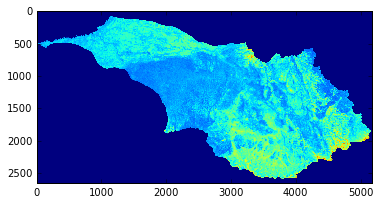

In [18]:
Ks1_Forrest = np.zeros(shape=(2648,5170))
Ks2_Forrest = np.zeros(shape=(2648,5170))
Ks3_Forrest = np.zeros(shape=(2648,5170))
Ks4_Forrest = np.zeros(shape=(2648,5170))
Ks5_Forrest = np.zeros(shape=(2648,5170))
Ks6_Forrest = np.zeros(shape=(2648,5170))
Kstotal_Forrest = np.zeros(shape=(2648,5170))

#function to obtain Ks values
def Ks_Forrest (ef, ks):
    for [i,j], value in np.ndenumerate(ef):
        if ef[i,j]<=0:
            ks[i,j]=0
        else: 
            ks[i,j]=(np.exp(10.8731+3.9140*np.log(ef[i,j])))*24/1000
       
    
Ks_Forrest(ef_porosity1, Ks1_Forrest)
Ks_Forrest(ef_porosity2, Ks2_Forrest)
Ks_Forrest(ef_porosity3, Ks3_Forrest)
Ks_Forrest(ef_porosity4, Ks4_Forrest)
Ks_Forrest(ef_porosity5, Ks5_Forrest)
Ks_Forrest(ef_porosity6, Ks6_Forrest)

Ks1_thick= 5/200
Ks2_thick= 10/200
Ks3_thick= 15/200
Ks4_thick= 30/200
Ks5_thick= 40/200
Ks6_thick= 100/200

#function to obtain a Ks weighted average 
def Total (x1,x1thick,x2,x2thick,x3,x3thick,x4,x4thick,x5,x5thick,x6,x6thick,xz):
    for [i,j], value in np.ndenumerate(xz):
        xz[i,j] = x1[i,j]*x1thick + x2[i,j]*x2thick + x3[i,j]*x3thick + x4[i,j]*x4thick + x5[i,j]*x5thick + x6[i,j]*x6thick

Total(Ks1_Forrest, Ks1_thick, Ks2_Forrest, Ks2_thick, Ks3_Forrest, Ks3_thick,
      Ks4_Forrest, Ks4_thick, Ks5_Forrest, Ks5_thick, Ks6_Forrest, Ks6_thick,
      Kstotal_Forrest)
new_array_to_raster(Kstotal_Forrest, 'C:/Users/ifue3702/Documents/Data Au/NSW/Ks_PTF/Kstotal_Forrest.tif')
plt.imshow(Kstotal_Forrest)